In [14]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()



In [8]:
# Create a DataFrame with the scaled data
# Apply StandardScaler to the data (this scales all the columns)
scaled_data = scaler.fit_transform(df_market_data)

# Convert the scaled data back into a DataFrame
df_scaled_data = pd.DataFrame(scaled_data, index=df_market_data.index, columns=df_market_data.columns)

# Display the first few rows of the scaled data
df_scaled_data.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
# Create an empty list to store the inertia values
inertia_values = []

# Loop over k-values from 1 to 11
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans_model.fit(df_scaled_data)
    
    # Append the inertia (sum of squared distances) to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia_values)


c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[287.0, 195.82021818036043, 123.19048183836956, 79.02243535120975, 65.302379141625, 52.88851821977532, 43.91469044757746, 37.51703249010357, 32.485240832183536, 28.22289929060893, 24.545512769147678]


In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'inertia': inertia_values
}

# Convert the dictionary into a DataFrame
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to verify the data
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


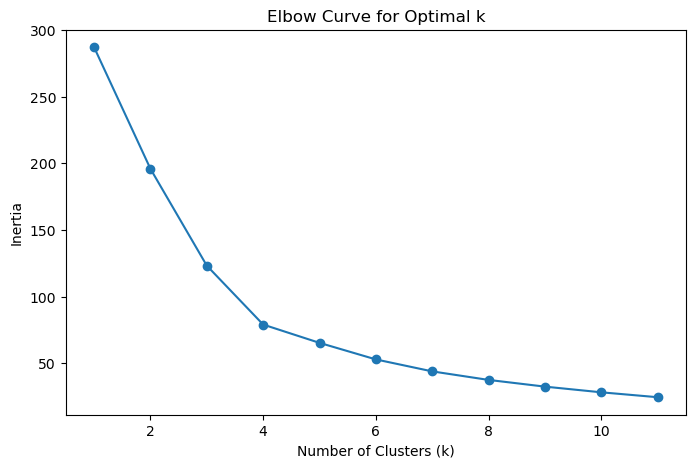

In [15]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')

# Add labels and title
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Display the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

Look for the point where the curve starts to flatten. This point indicates that the inertia no longer decreases significantly with the addition of more clusters.
The number of clusters corresponding to this point is the optimal value for k.
If you have already generated the plot, you should observe a sharp bend or "elbow" in the curve. The best value for k is usually the k-value at this elbow point.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [16]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Example value, replace with your identified value

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the model to the scaled data
kmeans_model.fit(df_scaled_data)

# Optionally, display the cluster centers
print("Cluster centers:\n", kmeans_model.cluster_centers_)

c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centers:
 [[ 0.23756041  1.19101578  0.83462785  0.19065425 -0.212313   -0.22264199
  -0.20800783]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]
 [ 0.03258562 -0.56998841 -0.4827023  -0.25453208 -0.07913767 -0.18795807
  -0.18203893]]


In [17]:
# Fit the K-Means model to the scaled DataFrame
kmeans_model.fit(df_scaled_data)

# After fitting, you can access the predicted cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Optionally, you can add the cluster labels to the original DataFrame
df_scaled_data['Cluster'] = cluster_labels

# Display the first few rows with the new cluster labels
df_scaled_data.head()

c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [19]:
# Remove the 'Cluster' column if it exists before predicting (just in case)
if 'Cluster' in df_scaled_data.columns:
    df_scaled_data = df_scaled_data.drop(columns=['Cluster'])

# Predict the clusters for the scaled DataFrame
predicted_clusters = kmeans_model.predict(df_scaled_data)

# Print the resulting array of cluster values
print(predicted_clusters)

# Optionally, add the predicted cluster labels back to the DataFrame
df_scaled_data['Cluster'] = predicted_clusters

# Display the first few rows of the DataFrame with clusters
df_scaled_data.head()


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [20]:
# Create a copy of the scaled DataFrame
df_scaled_data_copy = df_scaled_data.copy()

# Display the first few rows of the copied DataFrame
df_scaled_data_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [21]:
# Add the predicted clusters as a new column to the copied DataFrame
df_scaled_data_copy['Cluster'] = predicted_clusters

# Display the first few rows of the copy of the scaled DataFrame with clusters
df_scaled_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [22]:
# Create a scatter plot using hvPlot
scatter_plot = df_scaled_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',  # Color the points based on the cluster labels
    hover_cols=['coin_id']  # Include the crypto name when hovering over points
)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance with n_components set to 3
pca_model = PCA(n_components=3)

# Fit the PCA model to the scaled data (without the 'Cluster' column if it's present)
pca_model.fit(df_scaled_data.drop(columns=['Cluster'], errors='ignore'))

# Optionally, you can transform the data using the fitted PCA model
pca_transformed_data = pca_model.transform(df_scaled_data.drop(columns=['Cluster'], errors='ignore'))

# Display the shape of the transformed data
print(pca_transformed_data.shape)


(41, 3)


In [24]:
# Use the PCA model to fit and transform the scaled DataFrame
pca_data = pca_model.fit_transform(df_scaled_data.drop(columns=['Cluster'], errors='ignore'))

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_data.index)

# Display the first few rows of the PCA-transformed data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [25]:
# Retrieve the explained variance ratio for each principal component
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f} ({variance * 100:.2f}% of variance)")


Principal Component 1: 0.3720 (37.20% of variance)
Principal Component 2: 0.3470 (34.70% of variance)
Principal Component 3: 0.1760 (17.60% of variance)


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

The sum of the explained variances gives the total variance captured by the three principal components.
The total explained variance represents how much of the original dataset’s information is retained by the reduced dataset.

In [26]:
# Create a new DataFrame with the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled_data.index)

# Display the first few rows of the PCA DataFrame to verify
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [27]:
# Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [28]:
# Create an empty list to store the inertia values
inertia_values = []

# Loop over k-values from 1 to 11
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA-transformed data
    kmeans_model.fit(pca_df)
    
    # Append the inertia (sum of squared distances) to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
print(inertia_values)

c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

[256.87408556789234, 165.90199402035998, 93.77462568057298, 49.665496651797355, 37.87874703346249, 27.618971787957427, 21.18277586295733, 17.389823204768888, 13.59365037987673, 10.559357562793434, 8.007418066730596]


In [29]:
# Create a dictionary with the k-values and their corresponding inertia values
elbow_data = {
    'k': list(range(1, 12)),
    'inertia': inertia_values
}

# Convert the dictionary into a DataFrame
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame to verify the data
df_elbow.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


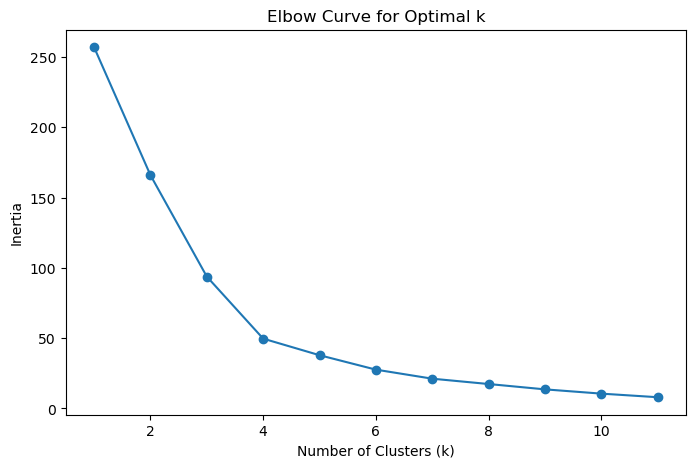

In [30]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')

# Add labels and title
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Display the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **The best value for k is typically identified by looking at the Elbow point on the Elbow curve. This is where the inertia (within-cluster sum of squared errors) starts to level off, meaning adding more clusters doesn’t provide much additional benefit. After plotting the Elbow curve with the PCA data, the value of k at this elbow point is considered the optimal number of clusters. For most datasets, this is often a value between 3 to 5, but it depends on the shape of your specific curve.:**


* **Question:** Does it differ from the best k value found using the original data?

  * ** Yes, it may differ. When using PCA, you reduce the dimensionality of the data, which simplifies the structure and removes noise. This often leads to a different clustering pattern, potentially resulting in a different optimal value for k. To confirm if it differs, compare the Elbow curves generated using the original data and the PCA-transformed data. If the elbow point shifts between the two, it indicates that PCA altered the structure of the data enough to influence the clustering outcome.:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [31]:
# Initialize the K-Means model using the best value for k
# Replace 'best_k' with the optimal value for k you determined from the Elbow curve
best_k = 4  # Example value, replace this with your actual identified value

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

# Fit the model to the PCA-transformed data
kmeans_model.fit(pca_df)

# Optionally, you can now print the cluster centers
print("Cluster centers:\n", kmeans_model.cluster_centers_)

c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centers:
 [[-0.51072664  0.84722621  1.16731549]
 [ 8.08901821 -3.89689054  2.30138208]
 [ 4.7923954   6.76767868 -1.98698545]
 [-0.24007567 -0.53402803 -0.59574992]]


In [32]:
# Fit the K-Means model to the PCA-transformed data
kmeans_model.fit(pca_df)

# After fitting, you can access the predicted cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Optionally, you can add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Display the first few rows with the new cluster labels
pca_df.head()


c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [33]:
# Predict the clusters for the PCA-transformed DataFrame
predicted_clusters = kmeans_model.predict(pca_df.drop(columns=['Cluster'], errors='ignore'))

# Print the resulting array of cluster values
print(predicted_clusters)

# Optionally, you can add the predicted cluster labels to the PCA DataFrame
pca_df['Predicted Cluster'] = predicted_clusters

# Display the first few rows of the PCA DataFrame with predicted clusters
pca_df.head()


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


,PC1,PC2,PC3,Cluster,Predicted Cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,0
ethereum,-0.458261,0.458466,0.952877,0,0
tether,-0.433070,-0.168126,-0.641752,3,3
ripple,-0.471835,-0.222660,-0.479053,3,3
bitcoin-cash,-1.157800,2.041209,1.859715,0,0


In [34]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column with the predicted clusters
pca_df_copy['Predicted Cluster'] = predicted_clusters

# Display the first few rows of the copy of the scaled PCA DataFrame
pca_df_copy.head()

,PC1,PC2,PC3,Cluster,Predicted Cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,0
ethereum,-0.458261,0.458466,0.952877,0,0
tether,-0.433070,-0.168126,-0.641752,3,3
ripple,-0.471835,-0.222660,-0.479053,3,3
bitcoin-cash,-1.157800,2.041209,1.859715,0,0


In [35]:
# Import hvplot
import hvplot.pandas

# Create the scatter plot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Predicted Cluster',  # Color by predicted clusters
    hover_cols=['coin_id'],  # Show crypto name on hover (you may need to adjust column names)
    width=800, 
    height=400,
    title="PCA Scatter Plot with K-Means Clustering"
)

# Display the plot
scatter_plot

:NdOverlay   [Predicted Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

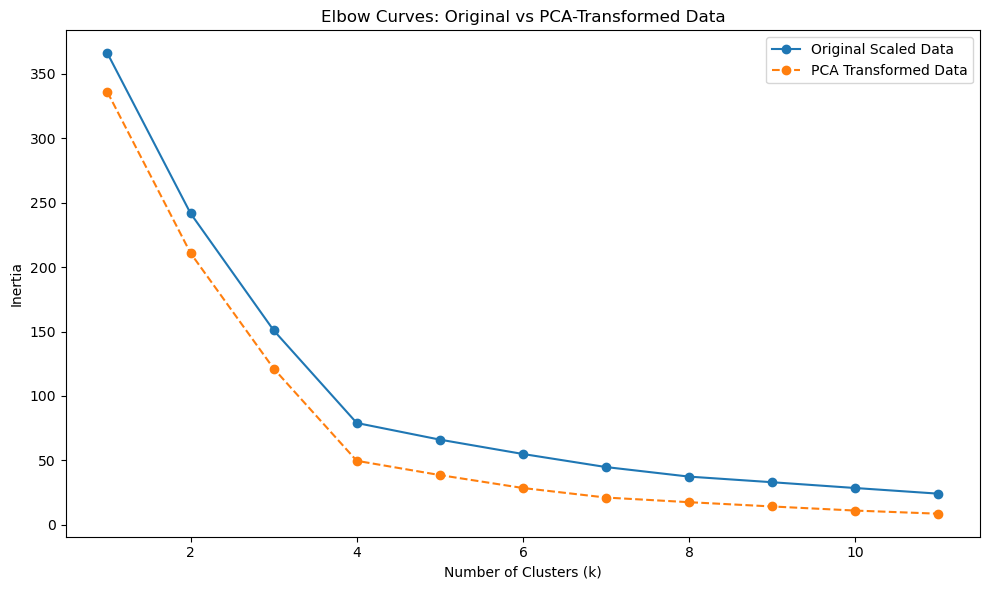

In [37]:
# Composite plot to contrast the Elbow curves
# Create an empty list to store inertia values for the original scaled data
inertia_values_original = []

# Create an empty list to store inertia values for the PCA-transformed data
inertia_values_pca = []

# Loop over k-values from 1 to 11 for the original scaled data
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the original scaled data (assuming df_scaled_data exists)
    kmeans_model.fit(df_scaled_data)
    
    # Append the inertia to the inertia list for original data
    inertia_values_original.append(kmeans_model.inertia_)

# Loop over k-values from 1 to 11 for the PCA-transformed data
for k in range(1, 12):
    # Create a KMeans model with k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the PCA-transformed data (pca_df)
    kmeans_model.fit(pca_df.drop(columns=['Cluster'], errors='ignore'))
    
    # Append the inertia to the inertia list for PCA data
    inertia_values_pca.append(kmeans_model.inertia_)
# Create a figure and axis for the composite plot
plt.figure(figsize=(10, 6))

# Plot the Elbow curve for the original scaled data
plt.plot(range(1, 12), inertia_values_original, marker='o', label='Original Scaled Data')

# Plot the Elbow curve for the PCA-transformed data
plt.plot(range(1, 12), inertia_values_pca, marker='o', label='PCA Transformed Data', linestyle='--')

# Add labels, title, and legend
plt.title('Elbow Curves: Original vs PCA-Transformed Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()

# Show the composite plot
plt.tight_layout()
plt.show()


c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mason\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

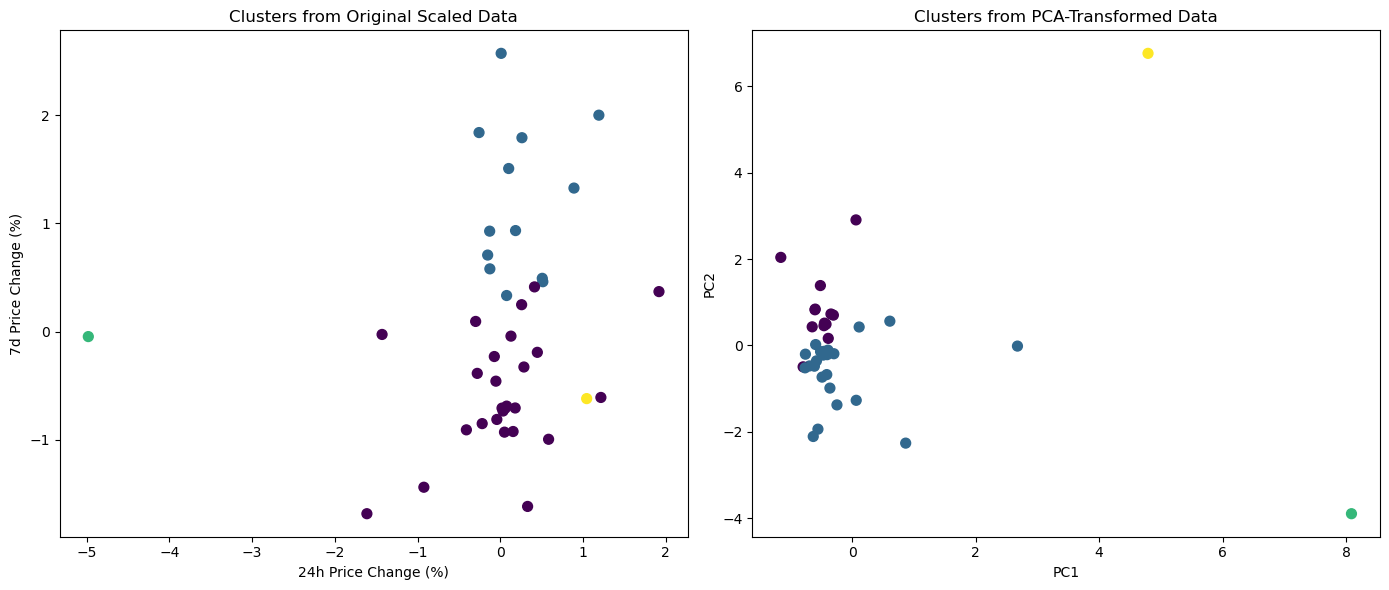

In [38]:
# Composite plot to contrast the clusters
# Define the best k value from the Elbow curve analysis (replace with your actual value)
best_k = 4

# Fit K-Means on the original scaled data
kmeans_original = KMeans(n_clusters=best_k, random_state=0)
kmeans_original.fit(df_scaled_data)
df_scaled_data['Original Cluster'] = kmeans_original.labels_

# Fit K-Means on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)
kmeans_pca.fit(pca_df.drop(columns=['Cluster'], errors='ignore'))
pca_df['PCA Cluster'] = kmeans_pca.labels_
# Create a figure for the composite plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters from original data (using two features)
ax1.scatter(df_scaled_data['price_change_percentage_24h'], df_scaled_data['price_change_percentage_7d'],
            c=df_scaled_data['Original Cluster'], cmap='viridis', s=50)
ax1.set_title('Clusters from Original Scaled Data')
ax1.set_xlabel('24h Price Change (%)')
ax1.set_ylabel('7d Price Change (%)')

# Plot clusters from PCA data (using PC1 and PC2)
ax2.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PCA Cluster'], cmap='viridis', s=50)
ax2.set_title('Clusters from PCA-Transformed Data')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

# Display the composite plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Simplified Structure:
By reducing the number of features, PCA captures the most important variance in the data and removes noise. This often leads to more distinct and meaningful clusters. The clusters may be more interpretable as they are based on a smaller number of core components (such as PC1 and PC2).
Loss of Detailed Information:
While PCA reduces dimensionality, it can also result in the loss of some fine-grained details. In certain cases, this may cause the clusters to be less precise, as some original features are discarded during the transformation.
Improved Efficiency:
Clustering on fewer features improves computational efficiency. The K-Means algorithm will converge faster with lower-dimensional data compared to clustering with the full set of features, especially for large datasets.
Cluster Shape:
PCA can sometimes reshape the clusters by combining information from multiple features into a few components. This may alter the geometric shape of clusters, as different features contribute to the principal components. As a result, the clusters in the PCA space may look different compared to those formed using the original features.
:** 